Probability that Method A is better than telemarketing: 0.9655754303071211


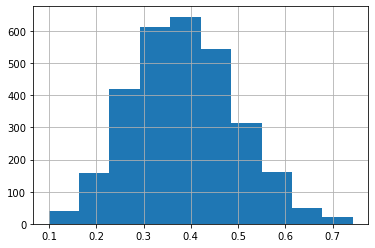

In [2]:
import pandas as pd
import numpy as np

n_draw = 50000
sample = 16
prior_rate = pd.Series(np.random.uniform(0, 1, size = n_draw)) 
def gen_model(prob):
    return(np.random.binomial(sample, prob))
subscribers = list()
for p in prior_rate:
    subscribers.append(gen_model(p))
observed_data = 6
post_rate = prior_rate[list(map(lambda x: x == observed_data, subscribers))]

post_rate.hist()
print('Probability that Method A is better than telemarketing:', sum(post_rate > 0.2) / len(post_rate))

If Method A was used on 500 people the likely number of sign-ups would be: 191

Number of draws left: 2963, Posterior mean: 192.720, Posterior 95% quantile interval: 91.000-306.950


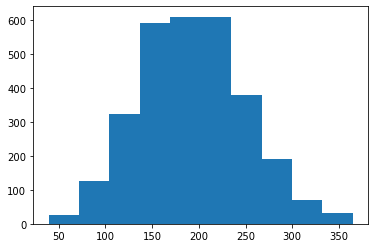

In [3]:
import matplotlib.pyplot as plt

sample_2 = 500

def gen_model_2(prob):
    return(np.random.binomial(sample_2, prob))
subscribers_2 = list()
for p in post_rate:
    subscribers_2.append(gen_model_2(p))

print('If Method A was used on 500 people the likely number of sign-ups would be:', int(np.median(subscribers_2)))

plt.hist (subscribers_2)

print('\nNumber of draws left: %d, Posterior mean: %.3f, Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(subscribers_2), np.mean(subscribers_2), np.quantile(subscribers_2, .025), np.quantile(subscribers_2,.975)))

There is 0.49402322404371585 probability showing that Method B rate is better than Method A rate.

Number of draws left: 5089, Posterior mean: 0.307, Posterior median: 4.000, 
Posterior 95% quantile interval: 0.169-0.460


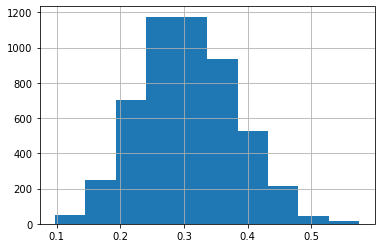

In [11]:
observed_data_B = 10
post_rate_B = prior_rate[list(map(lambda x: x == observed_data_B, subscribers))]
# Posterior rate for subscription in Method B.

dif_rate = post_rate_B.subtract(post_rate, fill_value = 0)
print('There is', sum(dif_rate > 0) / len(dif_rate), 'probability showing that Method B rate is better than Method A rate.')
# Comparing two Methods by substracting rates.

informed_prior = pd.Series(np.random.beta(5, 15, size = n_draw))
subscribers_3 = pd.Series([np.random.binomial(n = sample, p = p) for p in informed_prior])
post_rate_A3 = informed_prior[list(map(lambda x: x == observed_data, subscribers_3))]
post_rate_B3 = informed_prior[list(map(lambda x: x == observed_data_B, subscribers_3))]
# Making distributions of probability rates for both Methods based on CEO's 5-15% subscription rates.

post_rate_A3.hist()

print('\nNumber of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate_A3), np.mean(post_rate_A3), np.median(subscribers_3), np.quantile(post_rate_A3, .025), np.quantile(post_rate_A3,.975)))

Number of draws left: 2893, Posterior mean: -46.801, Posterior median: -45.064, 
Posterior 95% quantile interval: -358.737-247.575


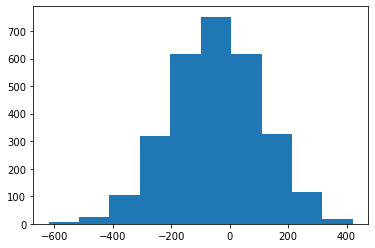

In [5]:
# cost of sending brochure = 30 kr
# cost of sending brochure and salmon = 300 kr
# average profit for subscription = 1000 kr

profit_A = list(map(lambda a: a * 1000 - 30, post_rate))
profit_B = list(map(lambda b: b * 1000 - 300, post_rate_B))
# Converting every subscription probability into profit - cost sum.
    
dif_profit = [profit_B[i] - profit_A[i] for i in range(min(len(profit_B), len(profit_A)))]
# Substracting sums of Method A from sums of Method B and making a histogram from the result.

plt.hist(dif_profit)
print('Number of draws left: %d, Posterior mean: %.3f, Posterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(dif_profit), np.mean(dif_profit), np.median(dif_profit), np.quantile(dif_profit, .025), np.quantile(dif_profit,.975)))
# We can see that graph shows that Method A is more efficient in overall cost/profit measures.